In [11]:
import numpy as np
import matplotlib.pyplot as plt
class Perceptron:
    def __init__(self, input_size, lr=0.1, epochs=100):
        self.weights = np.zeros(input_size + 1) 
        self.lr = lr 
        self.epochs = epochs  

    def activation(self, x):
        return 1 if x >= 0 else 0

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0] 
        return self.activation(summation)

    def train(self, training_data, labels):
        for _ in range(self.epochs):
            for inputs, label in zip(training_data, labels):
                prediction = self.predict(inputs)
                self.weights[1:] += self.lr * (label - prediction) * inputs 
                self.weights[0] += self.lr * (label - prediction)  

def generate_linearly_separable_data():
    np.random.seed(42)
    class_0 = np.random.randn(100, 2) + np.array([2, 2])
    class_1 = np.random.randn(100, 2) + np.array([-2, -2])
    data = np.vstack((class_0, class_1))
    labels = np.hstack((np.zeros(100), np.ones(100)))
    return data, labels

def plot_decision_boundary(perceptron, data, labels):
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='bwr', edgecolors='k')
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1

    w1, w2 = perceptron.weights[1], perceptron.weights[2]
    c = perceptron.weights[0]

    x1 = np.linspace(x_min, x_max, 100)
    x2 = -(w1 * x1 + c) / w2 
    plt.plot(x1, x2, color='black', linewidth=2, label="Decision Boundary")

    plt.title("Perceptron Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

Inputs: [[0 0 0]
 [0 1 0]
 [1 0 0]
 [1 1 0]
 [0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]
True XOR Outputs: [0 1 1 0 1 0 0 1]
Predicted XOR Outputs: [0, 1, 1, 0, 1, 0, 0, 1]


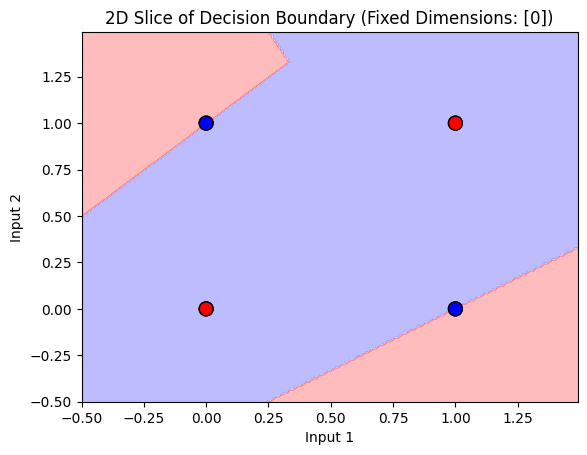

In [12]:
def generate_xor_data(n_dimensions):
    X = np.array(np.meshgrid(*[[0, 1]] * n_dimensions)).T.reshape(-1, n_dimensions)
    y = np.sum(X, axis=1) % 2
    return X, y

def xor_network(n_dimensions):
    X, y = generate_xor_data(n_dimensions)

    hidden_layer_size = 2**n_dimensions  
    hidden_perceptrons = [Perceptron(input_size=n_dimensions, lr=0.1, epochs=1000) for _ in range(hidden_layer_size)]
    perceptron_o = Perceptron(input_size=hidden_layer_size, lr=0.1, epochs=1000)

    for perceptron in hidden_perceptrons:
        intermediate_labels = np.random.randint(0, 2, size=len(y))  
        perceptron.train(X, intermediate_labels)

    hidden_outputs = np.array([[perceptron.predict(x) for perceptron in hidden_perceptrons] for x in X])

    perceptron_o.train(hidden_outputs, y)

    predictions = []
    for x in X:
        hidden_output = np.array([perceptron.predict(x) for perceptron in hidden_perceptrons])
        predictions.append(perceptron_o.predict(hidden_output))

    return X, y, predictions, hidden_perceptrons, perceptron_o

def plot_decision_boundary_2d_slice(X, y, hidden_perceptrons, perceptron_o, fixed_values=None):
    if fixed_values is None:
        fixed_values = [0] * (X.shape[1] - 2)  

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = np.zeros(xx.shape)
    for i in range(xx.shape[0]):
        for j in range(xx.shape[1]):
            x1 = xx[i, j]
            x2 = yy[i, j]
            input_point = np.array([x1, x2] + fixed_values)
            hidden_output = np.array([perceptron.predict(input_point) for perceptron in hidden_perceptrons])
            Z[i, j] = perceptron_o.predict(hidden_output)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k', s=100)
    plt.title(f"2D Slice of Decision Boundary (Fixed Dimensions: {fixed_values})")
    plt.xlabel("Input 1")
    plt.ylabel("Input 2")
    plt.show()

n_dimensions = 3  
X, y, predictions, hidden_perceptrons, perceptron_o = xor_network(n_dimensions)

print("Inputs:", X)
print("True XOR Outputs:", y)
print("Predicted XOR Outputs:", predictions)

plot_decision_boundary_2d_slice(X, y, hidden_perceptrons, perceptron_o, fixed_values=[0])